In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates
import ast
import os.path
from glob import glob
from datetime import datetime
import pytz
import difflib
from collections import OrderedDict

In [2]:
#Data will not include channels that are restricted to only admins for posting privilidges
ChannelName = "Alt-right_formaldiscussion"
#For now, just include all json files
file_name = ""
data = json.load(open("Alt-right/formal_discussion.json"))

In [4]:
#Reading data through

#Message data
messageData = []


#UID associated with name
"""
      "UID": {
        "name": Name
      },
"""
userList = []

#List of UIDs. Index if mentioned in 'u' in messages
"""
Ex:
      "384741477567430657": {
        "u": 13,
        "t": 1511799916403,
        "m": "https://i.imgur.com/Jud77MH.png",
        "e": [
          {
            "url": "https://imgur.com/Jud77MH",
            "type": "image"
          }
        ]
      },
"""
userIndex = []


#Channel Info
"""
      "UID of Channel": {
        "server": _IndexNumber_,
        "name": Name
      }
"""
channelInfo = []

In [5]:
for majorkey, subdict in data.iteritems():
    if majorkey == "data":
        messageData.append(subdict)

    if majorkey == "meta":
        for majorkey2, subdict2 in subdict.iteritems():
            if majorkey2 == "users":
                userList.append(subdict2)
            if majorkey2 == "userindex":
                userIndex.append(subdict2)
            if majorkey2 == "servers":
                channelInfo.append(subdict2)

print messageData



[{u'320404832823410690': {u'342115322356170753': {u'm': u'were not racists, were race realists', u'u': 63, u't': 1501637049045}, u'342513662545756160': {u'm': u'we are not going HOLOCAUST right away', u'u': 2, u't': 1501732020747}, u'342806555227324437': {u'm': u'There are some discords where you can', u'u': 8, u't': 1501801851804}, u'342793549604978698': {u'm': u'The British white man who landed the probe on the comet had his victory ruined when the twitter outrage brigade said his t shirt was sexism.  They forced him to make a tearful apology rather than praising him for landing a probe on a comet.', u'u': 7, u't': 1501798751022}, u'341982001114644480': {u'm': u'<@331165540347412481> what about "colonizing" non whites? Obviously without impregnating them', u'u': 8, u't': 1501605262784}, u'342806279867203584': {u'm': u"No. Is that something I can grab from the server? I don't know my way around discord very well", u'u': 23, u't': 1501801786153}, u'343176242956337153': {u'm': u'<@20269

In [18]:
#messageData


In [21]:
#Timestamps are in epoch time
timestamps = []
message = []
messageID = []
author = []

#author ID = index associated with userIndex
authorID = []
authorName = []

#Not a priority RN but collect anyways
imageData = []

#Convert lists to dictionaries
"""messageData2 = json.dumps(messageData)[0]
userList2 = json.dumps(userList)[0]
userIndex2 = json.dumps(userIndex)[0]
channelInfo2 = json.dumps(channelInfo)[0]

messageData3 = json.dumps(messageData)
userList3 = json.dumps(userList)
userIndex3 = json.dumps(userIndex)
channelInfo3 = json.dumps(channelInfo)

messageData4 = ast.literal_eval(messageData3)
userList4 = ast.literal_eval(userList3)
userIndex4 = ast.literal_eval(userIndex3)
channelInfo4 = ast.literal_eval(channelInfo3)"""

'messageData2 = json.dumps(messageData)[0]\nuserList2 = json.dumps(userList)[0]\nuserIndex2 = json.dumps(userIndex)[0]\nchannelInfo2 = json.dumps(channelInfo)[0]\n\nmessageData3 = json.dumps(messageData)\nuserList3 = json.dumps(userList)\nuserIndex3 = json.dumps(userIndex)\nchannelInfo3 = json.dumps(channelInfo)\n\nmessageData4 = ast.literal_eval(messageData3)\nuserList4 = ast.literal_eval(userList3)\nuserIndex4 = ast.literal_eval(userIndex3)\nchannelInfo4 = ast.literal_eval(channelInfo3)'

In [22]:
#Analyze message data
#print type(messageData4)

#Get message, userIndex, timestamp, and image data
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            messageID.append(c)
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
            """for d in a[b][c]:
                print a[b][c]
                #print d
                #temp = map(str, d)
                #print type(temp)
                #print temp[2]
                #if temp == 'm':

                """
            

        #authorID.append(userList)

print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)


            
"""for key, value in messageData.iteritems():
    for key2, value2 in messageData.iteritems():
        print key2"""

Number of messages: 2700
2700
2700


'for key, value in messageData.iteritems():\n    for key2, value2 in messageData.iteritems():\n        print key2'

In [8]:
#Map user ID to real name
"""print type(userList)
print userList"""
"""print userIndex
print type(userIndex)"""
userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

"""#Match first_date of post with index of authorName
for index in userIndex2:
    timestamps2 = []
    authorID2 = []
    message2 = []
    realID = index
    #Search for first post:
    minValue = 9999999999
    for a in messageData:   
        for b in a:
            for c in a[b]:
                temp = a[b][c]
                #print type(a[b][c])
                for key, value in temp.iteritems():
                    if key == "m": 
                        message2.append(value)
                    if key == "u":
                        authorID2.append(value)
                    if key == "t":
                        timestamps2.append(value)
                        if value < min:
                            minValue = value
    for 
    time_referential.append()"""

#Find name associated with ID
for index in authorID:
    #print index
    realID = userIndex2[index]
    realIDs.append(realID)
    #print realID
    #print userList2[realID]
    authorName.append(userList2[realID]["name"])
    #firstpost.append(time_referential[index])
    
#Note there are repeats in authorName so that you can directly associate it with the correct message_____

print len(authorName)




#From first data set. Should be bigger when all json files are added together
"""30300
30300
30300"""

71
71
2700


'30300\n30300\n30300'

In [22]:
print "Number of users: " + str(len(userList2))

Number of users: 71


2017-08-01 16:28:56.343000
2017-08-06 17:10:14.595000
                         count
Date                          
2017-08-02 01:24:09.045      1
2017-08-03 03:47:00.747      1
2017-08-03 23:10:51.804      1
2017-08-03 22:19:11.022      1
2017-08-01 16:34:22.784      1
2017-08-03 23:09:46.153      1
2017-08-04 23:39:52.227      1
2017-08-03 00:52:06.138      1
2017-08-05 16:20:50.758      1
2017-08-03 03:57:10.645      1
2017-08-03 20:20:42.998      1
2017-08-03 03:37:26.166      1
2017-08-02 18:03:16.586      1
2017-08-02 02:47:59.047      1
2017-08-01 17:38:03.289      1
2017-08-02 16:32:48.551      1
2017-08-02 18:23:05.877      1
2017-08-02 18:21:55.197      1
2017-08-01 16:55:12.356      1
2017-08-03 22:46:33.345      1
2017-08-03 18:07:30.447      1
2017-08-01 21:45:40.099      1
2017-08-04 06:25:53.978      1
2017-08-03 21:23:06.535      1
2017-08-02 17:12:01.489      1
2017-08-02 01:23:35.666      1
2017-08-02 02:17:30.009      1
2017-08-02 16:40:49.890      1
2017-08-04 22:35

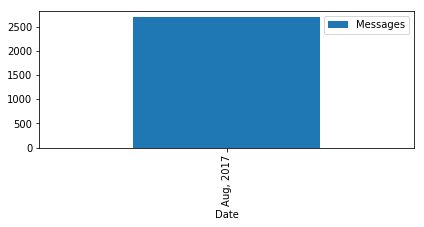

In [23]:
#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

print df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')



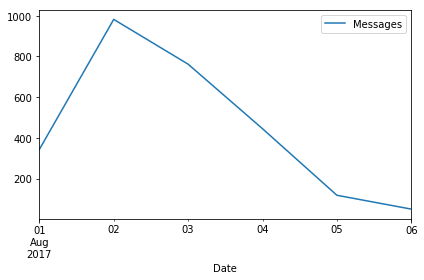

In [24]:
#Bar all
df = pd.DataFrame({'Date':timestamps})
df['count'] = 1

#Date time
df['Date'] = pd.to_datetime(df['Date'],unit='ms')

#Remove November Data for consistency:
df = df[(df['Date'].dt.year != 2017) | (df['Date'].dt.month != 11)]

#Reindex then delete
df.index = df['Date']
del df['Date']

df.columns = ["Messages"]
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesLine.png')

In [25]:
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

gb = df.groupby("user")["count"].agg({'count':sum})
#gb = df.groupby("user")["count"].sum()

#gb = gb.reset_index(drop=True)
#gb.columns = ["User","Count"]
#print gb
gb= gb.sort_values("count")
gb["ones"]=1
print gb
gb.to_csv(ChannelName + "UserPosts.csv", sep='\t', encoding = 'utf-8')

#Great graph info: https://stackoverflow.com/a/29499109/4698963
#print gb.plot(kind='bar')

#TODO
#Group by 1000s
#How many users per 1000s count
#Number of messages vs. Number of users
#Not sure how to do this rn


                                count  ones
user                                       
!JötenHeimr                         1     1
kesk                                1     1
handrubbingmerchant                 1     1
Zouckwor                            1     1
Victor Bravo                        1     1
TheBigKK                            1     1
Snakeisninja                        1     1
Oppai Knight                        1     1
Mitch_L                             1     1
JohnnyTruthSeed                     1     1
Goldstein Riots                     1     1
deMoivre                            2     1
stoner_cough                        2     1
MsNatSocialist                      2     1
Default(BASEDdeathsquadmember)      2     1
Ｃｏｐｅｆｉｅｌｄ                           2     1
Mee6                                3     1
Ulfrik Nordmann                     3     1
AngloEngineer                       3     1
14now                               3     1
BasedWhiteGoy                   

                      Date  count2
0  2017-08-02 01:24:09.045       1
1  2017-08-03 03:47:00.747       3
2  2017-08-03 23:10:51.804     107
3  2017-08-03 22:19:11.022      51
4  2017-08-01 16:34:22.784       3
5  2017-08-03 23:09:46.153       7
6  2017-08-04 23:39:52.227       3
7  2017-08-03 00:52:06.138      11
8  2017-08-05 16:20:50.758      17
9  2017-08-03 03:57:10.645      23
10 2017-08-03 20:20:42.998     190
11 2017-08-03 03:37:26.166      13
12 2017-08-02 18:03:16.586      15
13 2017-08-02 02:47:59.047      33
14 2017-08-01 17:38:03.289      27
15 2017-08-02 16:32:48.551       2
16 2017-08-02 18:23:05.877      92
17 2017-08-02 18:21:55.197      43
18 2017-08-01 16:55:12.356      18
19 2017-08-03 22:46:33.345      10
20 2017-08-03 18:07:30.447       9
21 2017-08-01 21:45:40.099       9
22 2017-08-04 06:25:53.978       1
23 2017-08-03 21:23:06.535      41
24 2017-08-02 17:12:01.489      78
25 2017-08-02 01:23:35.666      18
26 2017-08-02 02:17:30.009      42
27 2017-08-02 16:40:

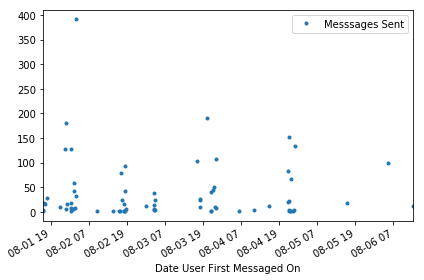

In [26]:
#Scattergraph
#Numer of posts over time
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
#gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
gb2 = gb2.reset_index(drop=True)
gb2['timestamps'] = df['date']
gb2['Date'] = pd.to_datetime(df['date'],unit='ms')
gb2["count2"] = gb2["count"]
del gb2['timestamps']
del gb2["count"]
print gb2

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
#bigdata.index = bigdata['Date']

#print gb2
gb2.columns = ["Date User First Messaged On","Messsages Sent"]
retweets = gb2.plot(x="Date User First Messaged On", y="Messsages Sent", style=".")
plt.tight_layout()
plt.savefig(ChannelName + 'MessagesSentScatter.png')
#my_scatter = pd.scatter_matrix(bigdata, diagonal="kde")

/home/ethanc/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736542.0, right=736542.0
  'left=%s, right=%s') % (left, right))


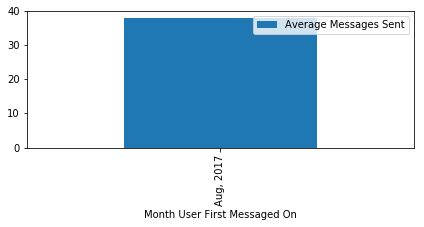

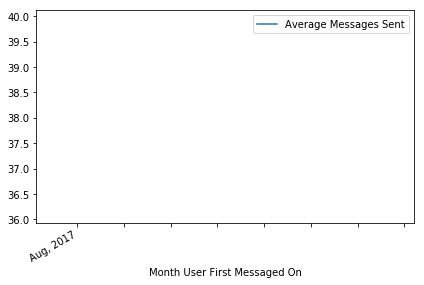

In [27]:
#Time referential graph vs average number of posts
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
bigdata = pd.concat([gb, gb2], axis=1)
bigdata = bigdata.reset_index(drop=True)
#print bigdata
#print bigdata

#Remove November Data for consistency:
bigdata = bigdata[(bigdata['Date'].dt.year != 2017) | (bigdata['Date'].dt.month != 11)]

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
bigdata.index = bigdata['Date']
gb3 = bigdata.groupby([(bigdata.index.year),(bigdata.index.month)]).mean().reset_index()
#print gb3

gb3.columns = ["Year", "Month", "Average Messages Sent"]
gb3['Month User First Messaged On'] = gb3[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb3['Month User First Messaged On'] = pd.to_datetime(gb3['Month User First Messaged On'])
del gb3['Year']
del gb3['Month']

#Bar
ax = gb3.set_index('Month User First Messaged On').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeRefVsAveragePostsBar.png')



#Line
ax = gb3.set_index('Month User First Messaged On').plot()
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeRefVsAveragePostsLine.png')

#Find time_referential = start date of posting

In [28]:
#Average number of posts per user vs Time started
#Time

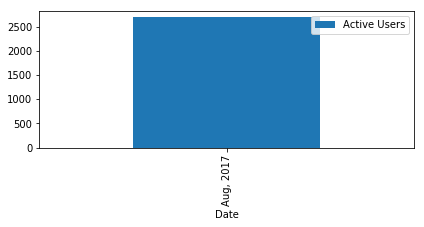

In [29]:
#Number of active users per month

#active user = user who posts at least once
df = pd.DataFrame({'date':timestamps, 'messages':message, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1
df.index = df['Date']
del df['date']

#Sort
df.sort_values(by='Date')
#print df
"""#Seperate dataframe into months so that you can remove duplicates later

#Group by month for number of active users
gb = df.groupby([(df.index.year),(df.index.month)])
print gb
"""

#List of dfs by month and year
dfList = []
for region, df_region in df.groupby([(df.index.year),(df.index.month)]):
    #print(len(df_region))
    dfList.append(df_region)
    
#Drop duplicates from timerange https://stackoverflow.com/questions/47341275/pandas-drop-duplicates-within-date-range
#Goal: Drop duplicates within each month
#Alt: drop duplicates for each subset dataframe
#Dropping duplicates so that all users within a month period is unique
#print "asdfasdf"
cleandfList =[]
for dataframe in dfList:
    #Use user_id since users can have the same name!!!
    dataframe = dataframe.drop_duplicates(subset="user_id")
    #print len(dataframe)
    cleandfList.append(dataframe)
    
#Combine dataframes
bigDF = pd.concat(cleandfList)
#print len(bigDF)
del bigDF['messages']
del bigDF['user']
del bigDF['user_id']
bigDF.index = bigDF['Date']
#print bigDF

#Count total of active users by months
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Active Users"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'ActiveUsers.png')


   Message Length       Date
0       73.080741 2017-08-01


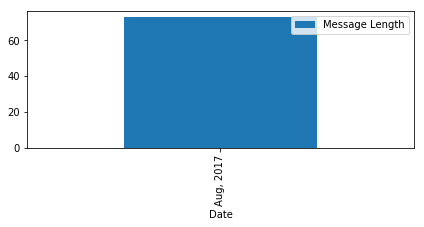

In [30]:
#Length of messages (aggregate average)

#TODO: NEED TO DO COHORT ANALYSIS

#Get messages + timestamps
df = pd.DataFrame({'date':timestamps, 'messages':message})
df['Date'] = pd.to_datetime(df['date'],unit='ms')

#Find length of each post
df['length'] = df['messages'].str.len()
#df['count'] = 1
del df["messages"]
del df["date"]
df.index = df['Date']
#print df

#Find Average + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).mean().reset_index()
gb.columns = ["Year", "Month", "Message Length"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeAverageLength.png')

print gb

In [31]:
#Word Cloud
#idk what I'm doing. Gonna just do: https://github.com/amueller/word_cloud
import unicodedata

#Just get txt file I guess
with open(ChannelName + "ListofMessages.txt", "w") as output:
    for item in message:
        temp = unicodedata.normalize('NFKD', item).encode('ascii','ignore')
        """     
        stopwords = ['http','https','tweet','new','New','twitter','Twitter', 'Tweet']
        #querywords = temp.split()
        for word in stopwords:
            temp = temp.replace(word, '')
        """
        #print result
        #take out http, https, links etc.
        output.write(temp)

In [7]:
#ONLY DO ONCE
#DO NOT WASTE API CALLS





key = "a29261266be5f2798d7d08bac9bb70d6"

from json import loads
from hatebase import HatebaseAPI

hatebase = HatebaseAPI({"key": key})
#"language": "eng"
pagenumber = 1
responses = []

#Loads top 1000 results
while pagenumber <= 11:
    filters = {"country":"US", "page": str(pagenumber)}
    output = "json"
    query_type = "vocabulary"
    response = hatebase.performRequest(filters, output, query_type)

    # convert to Python object
    responses.append(loads(response))
    pagenumber += 1
    
print "Done getting API results"

Done getting API results


In [8]:
#Process Hate Words
data = []
for r in responses:
    data.append(r["data"])
#print len(data)
listofHatewords = []

#print len(data)
for z in data:
    for a, v in z.iteritems():
        for b in v:
            listofHatewords.append(b["vocabulary"])
print listofHatewords
listofHatewords = list(OrderedDict.fromkeys(listofHatewords))
print len(listofHatewords)

[u'786', u'969', u'abachabu', u'abagima', u'abaisia', u'abazungu', u'abbo', u'ABC', u'ABCD', u'abd', u'abeed', u'abelungu', u'abid', u'abo', u'Adolf', u'af', u'African catfish', u'Africoon', u'Afro-Saxon', u'Ahab', u'Ahmadiyah', u'Ainu', u'Ajam', u'ajayee', u'akata', u'akhbaroshim', u'alaman', u'albino', u'alligator bait', u'allochtoon', u'amakwerekwere', u'ambattar', u'ame koh', u'Americoon', u'AmeriKKKan', u'Ami', u'Amo', u'anchor baby', u'ang mor', u'Angie', u'Anglo', u'Ann', u'anyagat', u'ape', u'apple', u'arabush', u'aracuano', u'arapis', u'Argie', u'Armo', u'Asylschmarotzer', u'Aunt Jane', u'Aunt Jemima', u'Aunt Mary', u'Aunt Sally', u'avalivavandu', u'avaseeve', u'azn', u'azungu', u'badugudugu', u'bahadur', u'bai tou', u'baianagem', u'baijo', u'Baitola', u'bak guiy', u'balija', u'baluba', u'baluga', u'bamboo coon', u'banana', u'banana bender', u'banana lander', u'Bangla', u'banjo lips', u'bans and cans', u'basungu', u'Bazi', u'bazungu', u'beach nigger', u'bean dipper', u'beaner'

In [6]:
#Process Hate Words
data = []
for r in responses:
    data.append(r["data"])
#print len(data)
listofHatewords = []

#print len(data)
for z in data:
    for a, v in z.iteritems():
        for b in v:
            listofHatewords.append(b["vocabulary"])
print listofHatewords
listofHatewords = list(OrderedDict.fromkeys(listofHatewords))
print len(listofHatewords)

[u'786', u'969', u'abachabu', u'abagima', u'abaisia', u'abazungu', u'abbo', u'ABC', u'ABCD', u'abd', u'abeed', u'abelungu', u'abid', u'abo', u'Adolf', u'af', u'African catfish', u'Africoon', u'Afro-Saxon', u'Ahab', u'Ahmadiyah', u'Ainu', u'Ajam', u'ajayee', u'akata', u'akhbaroshim', u'alaman', u'albino', u'alligator bait', u'allochtoon', u'amakwerekwere', u'ambattar', u'ame koh', u'Americoon', u'AmeriKKKan', u'Ami', u'Amo', u'anchor baby', u'ang mor', u'Angie', u'Anglo', u'Ann', u'anyagat', u'ape', u'apple', u'arabush', u'aracuano', u'arapis', u'Argie', u'Armo', u'Asylschmarotzer', u'Aunt Jane', u'Aunt Jemima', u'Aunt Mary', u'Aunt Sally', u'avalivavandu', u'avaseeve', u'azn', u'azungu', u'badugudugu', u'bahadur', u'bai tou', u'baianagem', u'baijo', u'Baitola', u'bak guiy', u'balija', u'baluba', u'baluga', u'bamboo coon', u'banana', u'banana bender', u'banana lander', u'Bangla', u'banjo lips', u'bans and cans', u'basungu', u'Bazi', u'bazungu', u'beach nigger', u'bean dipper', u'beaner'

In [1]:
#input list of hatewords from text file
listofHatewords = json.load(open('listofhatewords.json'))
print listofHatewords

NameError: name 'json' is not defined

In [23]:
#Check hate word frequency



#Use ntlk and hatelibrary
#http://www.nltk.org/book/ch01.html
#hatelibrary sign up for API: https://www.hatebase.org/login_register/registration_success
#a29261266be5f2798d7d08bac9bb70d6
#Daily Limit = 100 <=
#But I can always get a new key

#Do ntlk stuff after

#Two types of graphs: one for frequency among all words and frequency among all posts.

#NOTE
"""
If you publish work that uses NLTK, please cite the NLTK book as follows:

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.
"""


#print data
#print listofHatewords
#print len(listofHatewords)
#print listofHatewords

"""#test difflib

test123 = "dyke d*ke dy*e dnke"

test123 = test123.split(" ")

print difflib.get_close_matches("dyke", test123, 10, .75)"""

#python wrapper : https://github.com/DanielJDufour/hatebase

#Message is equal to each other

#print len(message)
#initiate lists to set length
frequency = []
versionsOfWord = []
#frequencyID = []
frequencyTime = []
#Index of original message list
listmessageID = []
listauthors = []
frequencyIndex = []
for x in range(0, 1000):
    frequency.append(0)

"""
for x in range(0, 1000):
    frequencyID.append([])
"""
for x in range(0, 1000):
    listmessageID.append([])
for x in range(0, 1000):
    listauthors.append([])

for x in range(0, 1000):
    frequencyTime.append([])
for x in range(0, 1000):
    frequencyIndex.append([])
    
for x in range(0, 1000):
    versionsOfWord.append([])

#NTLK 
#FROM: https://stackoverflow.com/a/45158719/4698963
from nltk.corpus import wordnet as wn
#We'll store the derivational forms in a set to eliminate duplicates
index2 = 0
for word in listofHatewords:
    forms = set()
    for happy_lemma in wn.lemmas(word): #for each "happy" lemma in WordNet
        forms.add(happy_lemma.name()) #add the lemma itself
        for related_lemma in happy_lemma.derivationally_related_forms(): #for each related lemma
            forms.add(related_lemma.name()) #add the related lemma
        versionsOfWord[index2] = forms
    index2 += 1
print len(versionsOfWord)

"""#Measure time of loop
import time
start = time.clock() """

#old code
#Time for 254776 messages: 3323.288668 seconds
#Time for all 2979089 result minimum: 10.7942016982 hours

#new code
#Time for 1000 messages: 13.301362 seconds
#Time for 2979089 messages: 11.007205894227 hours

#new new code
#Time for 1000 messages: 11.202224 second
#Time for 2979089 messages: 9.2701173038712 hours
    
totalNumberofWords = 0
counter = 0
print len(message)
print len(messageID)
print len(timestamps)
for m, m_id, date, a_id in zip(message, messageID, timestamps, authorID):
    #print m
    totalNumberofWords += len(m)
    lower = m.lower()
    index = 0

    
    
    if counter%100000==0:
        print counter
    #print counter
    #Need to tokenize to get all frequencies
    for word in listofHatewords:
        wordLowered = word.lower()
        listof_lower = lower.split(" ")
        similarWords = versionsOfWord[index]

        #matchesHate = difflib.get_close_matches(word, listof_lower, 1, .5)
        #https://docs.python.org/2/library/difflib.html
        #Else if check the NTLK forms of words
        #Check if there are versions of the word first though
        #TOOK out "word in lower" since it was inaccurate
        if wordLowered in listof_lower or len(difflib.get_close_matches(wordLowered, listof_lower, 1, .75)) >= 1:
            frequency[index]+=1
            frequencyIndex[index].append(counter)
            #frequencyID[index].append(str(m_id) + " " + m)
            frequencyTime[index].append(date)
            listmessageID[index].append(m_id)
            listauthors[index].append(a_id)
        elif len(similarWords) > 0:
            #found = False
            for a in similarWords:
                aLowered = a.lower()
                if aLowered in listof_lower or len(difflib.get_close_matches(aLowered, listof_lower, 1, .75)) >= 1:
                    #found = True
                    frequency[index]+=1
                    frequencyIndex[index].append(counter)
                    #frequencyID[index].append(str(m_id) + " " + m)
                    frequencyTime[index].append(date)
                    listmessageID[index].append(m_id)
                    listauthors[index].append(a_id)
                    #print "test" + str(counter)
                    break 
        #Increase index to make sense
        if index >= len(listofHatewords):
            print "Length error"
        
        index+=1
    counter += 1

#check asterisk. 
#Get list of words
#Use difflib library => get_close_matches of words. Cutoff value
#Use NTLK
#Think about software filtering methods

print "All Done" + str(len(message))
#print frequency



#Total mentions of words in posts
#=>Treats each word in every post as equal<=

#Process data
jsonList = []

for i in range(0,1000):
    jsonList.append({'hateword': listofHatewords[i], 'messageID': listmessageID[i], 'authorID':listauthors[i], 'frequency': frequency[i], 'frequencyIndex':frequencyIndex[i], 'frequencyTime':frequencyTime[i]})
    
#print(json.dumps(jsonList, indent = 1))

#Put to file
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"

1000
2700
2700
2700
0
All Done2700


In [19]:
"""jsonDF = pd.DataFrame({'hateword': listofHatewords, 'messageID': messageID, 'authorID':listauthors, 'frequency': frequency, 'frequencyIndex':frequencyIndex, 'frequencyTime':frequencyTime})
#print(json.dumps(jsonList, indent = 1))
json = jsonDF.to_json()

print json"""

jsonList = []

for i in range(0,1000):
    jsonList.append({'hateword': listofHatewords[i], 'messageID': messageID[i], 'authorID':listauthors[i], 'frequency': frequency[i], 'frequencyIndex':frequencyIndex[i], 'frequencyTime':frequencyTime[i]})
    


#Put to file
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"

In [ ]:
#output list of hate words into text file
#DON'T RUN
import simplejson
try:
    print listofHatewords
    f = open('listofhatewords.json', 'w')
    simplejson.dump(listofHatewords, f)
    f.close()
except NameError:
    print "Almost erased listofhatewords.json! Be careful!!!"





In [ ]:
#input list of hatewords from text file
listofHatewords = json.load(open('listofhatewords.json'))

In [ ]:
#Store frequency
#output list of hate words into text file
#DON'T RUN
import simplejson
try:
    f = open(ChannelName + 'frequencyHate.json', 'w')
    simplejson.dump(frequency, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "frequencyHate.json! Be careful!!!"





/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    Hate Word  Percentage of Appearances of Messages
443        ho                               0.019259
444       hoe                               0.020000
562      kike                               0.020370
992    whitey                               0.021111
620       ned                               0.021481
468      ikey                               0.021481
467       ike                               0.022222
914       tan                               0.024815
409      Gwat                               0.028148
868     snout                               0.032963
48      Argie                               0.035556
211      chav                               0.037407
336       Fin                               0.056667
369       gin                               0.064074
958      twat                               0.076667


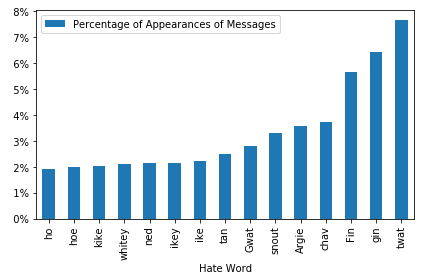

In [13]:
'''
Graphs percentage of mentions of ____ hate word in posts


'''

#print totalNumberofWords
#print frequency

#TODO percentages + save list of hate words into file for further analysis
#Test for every word
#Create matrix where this is the message || 
#parse vector => how many words is mentioned
#counter vectorizer => ski kit learn. vocabulary is list of 1000 words
#^count how many times a word occurs
#Sum of rows
#Find which of the words occur the most


#Use pandas

df = pd.DataFrame({'words':listofHatewords, 'frequency':frequency})

#Sort 
df = df.sort_values('frequency')
#print df

#Cut to top ten most popular posts
gb = df.tail(15)

#total number of words
lengthOfMessages = len(message)
#print gb

#Calculate percentage
gb["percentage"] = (gb["frequency"]/lengthOfMessages)
percentageList = gb['percentage'].tolist()

#print df
del gb["frequency"]

#Rename Columns
gb.columns = ["Hate Word", "Percentage of Appearances of Messages"]
print gb
#Graph percentages

ax = gb.set_index('Hate Word').plot(kind='bar')
plt.tight_layout()

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
im = ax
image = im.get_figure()
image.savefig(ChannelName + 'HateSpeechBar.png')



###### Check how many mentions of "Unite the Right" or "Charlottesville"
containsWords = []
mentionFrequency = []

#print len(message)

for m in message:
    words = ["unite the right", "charlottesville"]
    lowercase = m.lower()
    containedWord = False
    count = 0
    for word in words:
        if word in lowercase:
            containedWord = True
            containsWords.append(1)
            #FIND HOW MANY MENTIONS PER MESSAGE
            count = count + lowercase.count(word)
    print count
    mentionFrequency.append(count)
            
    if not containedWord:
        containsWords.append(0)
        
"""print len(containsWords)
print len(message)

print containsWords"""


df = pd.DataFrame({'date':timestamps, 'mentionsCharlottesville':containsWords})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
gb = df[df.mentionsCharlottesville.isin([1])]
gb['Date'] = pd.to_datetime(gb['date'],unit='ms')
gb["mentions"] = gb["mentionsCharlottesville"]
del gb['date']
del gb["mentionsCharlottesville"]
gb.index = gb['Date']
del gb["Date"]

print gb
#print gb
#REmove all data without any mentions about discord

#print df
#Find Max + Reset Index (so that I can reassign column names)
gb = gb.groupby([(gb.index.year),(gb.index.month), (gb.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %d, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'RallyMentionsBarDay.png')

#Total mentions
print len(mentionFrequency)
print len(containsWords)




In [2]:
import json
filename = "Alt-right_formaldiscussionAllfrequenciesFull.json"

jsonF = json.load(open(filename))
import itertools
from __future__ import division
#Store data
frequency = []
messageIndexes = []
nonSorted = []
#find uniqueness
    
for b in jsonF:
    frequency.append(b["frequency"])
    messageIndexes.append(b["frequencyIndex"])
messageIndexes.sort()
#print messageIndexes
neatIndexes = list(messageIndexes for messageIndexes,_ in itertools.groupby(messageIndexes))
percentage = (len(neatIndexes)/2700)*100
print percentage
"""#Sort message index
for a in messageIndexes:
    for i in a:
        nonSorted.append(i)
        
sortED = list(OrderedDict.fromkeys(nonSorted))

#Total count of
hatemessagelength = len(nonSorted)
#Total percentage
print hatemessagelength/len(message)"""


11.2962962963


'#Sort message index\nfor a in messageIndexes:\n    for i in a:\n        nonSorted.append(i)\n        \nsortED = list(OrderedDict.fromkeys(nonSorted))\n\n#Total count of\nhatemessagelength = len(nonSorted)\n#Total percentage\nprint hatemessagelength/len(message)'

In [12]:
#Percentage average
#Remove 0's
averagefreq = reduce(lambda x, y: x + y, percentageList) / 15
print averagefreq
print "Average percentage: " + str(averagefreq*100) + "%"

0.0848888888889
Average percentage: 8.48888888889%
